In [1]:
import numpy as np
import SimpleITK as sitk
import collections
import random
import PIL as img
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 

In [2]:
import imgaug as ia
from imgaug import augmenters as iaa

In [3]:
#ls C:\Users\User\Desktop\Mask_generator\

In [3]:
#my_path =r'C:\Users\User\Desktop\Mask_generator\'           
my_path =r'C:\Users\User\Desktop\nii\Atta-texana_CASENT0709539_head_tomo-A_recon.txm2.nii'

In [61]:
#my_nii = sitk.ReadImage(r'C:\Users\User\Desktop\Mask_generator\Melissotarsus_W_head_segmentation.nii',sitk.sitkFloat32) #read nii file
#my_nii_np = sitk.GetArrayFromImage(my_nii)  # store data as array
my_nii = sitk.ReadImage(r'C:\Users\User\Desktop\Atta-texana_CASENT0709539_head_tomo-A_recon2.labels.nii',sitk.sitkFloat32) #read nii file
my_nii_np = sitk.GetArrayFromImage(my_nii)  

In [5]:
print (my_nii_np.shape) # array dimensions

(992, 1013, 995)


In [7]:
#plt.imshow(my_nii_np[:,:,300]) #plot slice 300

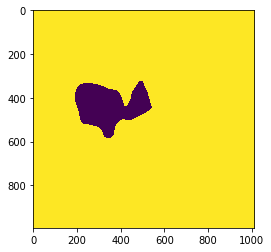

In [47]:
plt.imshow(my_nii_np[:,:,500])

In [48]:
collections.Counter(my_nii_np[:,:,500].flatten()) # check all categories (labels)

Counter({3.0: 955099, 2.0: 52836})

In [42]:
slice_0 = my_nii_np[:,:,500] # slice 500 stored in a new variable
slice_0[slice_0!=2]=0 # change all pixels to 0 (except category 10)
slice_0[slice_0!=0]=1

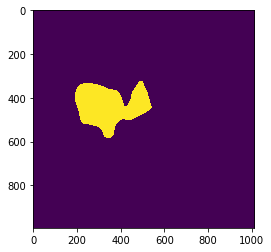

In [33]:
plt.imshow(slice_0) # plot
plt.show()

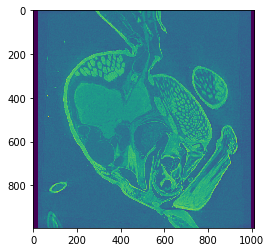

In [38]:
my_rawnii = sitk.ReadImage(r'C:\Users\User\Desktop\Atta-texana_CASENT0709539_head_tomo-A_recon.txm.nii',sitk.sitkFloat32) #read raw nii file
my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  # store data as array

rawslice_0 = my_rawnii_np[:,:,500] # slice 500 stored in a new variable

plt.imshow(rawslice_0) # plot
plt.show()

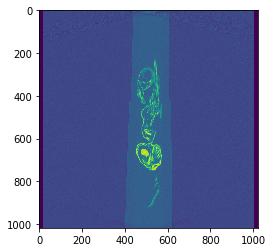

In [3]:
my_rawnii = sitk.ReadImage(r'C:\Users\User\Desktop\CASENT0709539_Att_tex_body_tomo-A_recon.txm.nii',sitk.sitkFloat32) #read raw nii file
my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  # store data as array

rawslice_0 = my_rawnii_np[:,:,520] # slice 500 stored in a new variable

plt.imshow(rawslice_0) # plot
plt.show()

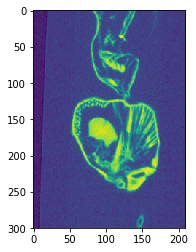

In [7]:
raw1 = rawslice_0[500:800,400:610]
plt.imshow(rawslice_0[500:800,400:610])  #extract same patch with segm and plot.
plt.show()

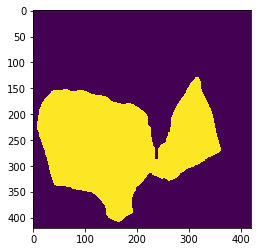

In [10]:
mask1 = slice_0[180:600,180:600]
plt.imshow(slice_0[180:600,180:600])  #extract a patch and plot.
plt.show()

In [36]:
ia.seed(4)

augmentation =  iaa.Affine(rotate=(-25, 25))


In [8]:
import imageio
for i in range(520,521):
    #slice_0 = my_nii_np[:,:,i]
   # slice_0[slice_0!=3]=1 
   # slice_0[slice_0==3]=0
    my_rawnii = sitk.ReadImage(r'C:\Users\User\Desktop\CASENT0709539_Att_tex_body_tomo-A_recon.txm.nii') 
    my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  
    rawslice_0 = my_rawnii_np[:,:,i]
    
    rawoutput = []
    #maskoutput = []
    for x in range(0,9):
        raw1 = rawslice_0[500:800,400:610]
        rawoutput.append(raw1)
     #   mask1 = slice_0[180:600,180:600]
     #   maskoutput.append(mask1)

    y = 0
    for x in range(0,9):
        rawimages = sitk.GetImageFromArray(rawoutput[x])
        rawimages = sitk.Cast(sitk.RescaleIntensity(rawimages),sitk.sitkUInt8)
        sitk.WriteImage( rawimages, 'Atta_texana_'+ str(i-349)+'.tif')
        #maskimages = sitk.GetImageFromArray(maskoutput[x])  
        #maskimages = sitk.Cast(sitk.RescaleIntensity(maskimages),sitk.sitkUInt8)
        #sitk.WriteImage(maskimages, 'Atta_texana_'+ str(i-349)+'_mask.tif')         
        sitk.WriteImage( rawimages , 'im_'+str(i)+'.png')
        im = imageio.imread('Atta_texana_'+str(i-349)+'.tif')
        #aug = iaa.HistogramEqualization()
        #image_aug = aug.augment_image(im)
        aug = iaa.Resize(520, interpolation=["linear", "cubic"])
        image_aug = aug.augment_image(im)
        image_aug = sitk.GetImageFromArray(image_aug)
        sitk.WriteImage( image_aug , 'Atta_texana_full_body.tif')
        #im_mask = imageio.imread('Atta_texana_'+str(i-349)+'_mask.tif')
        #image_aug_mask = aug.augment_image(im_mask)
        #image_aug_mask = sitk.GetImageFromArray(image_aug_mask)
        #sitk.WriteImage(image_aug_mask, 'Atta_texana_'+ str(i-349)+'_mask.tif')
        y +=1
        

In [39]:
#sitk.ReadImage('image_551.tif')               
#sitk.WriteImage( augm_images , 'image_551.png')

In [11]:
#import imageio

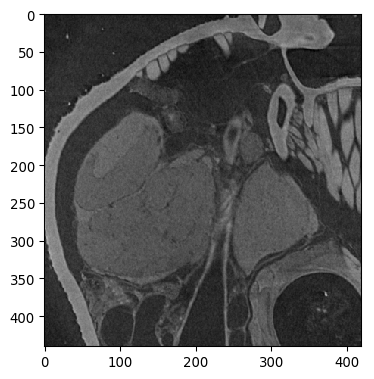

In [48]:
#im = imageio.imread('image_551.png')
#ia.imshow(im)

Augmented:


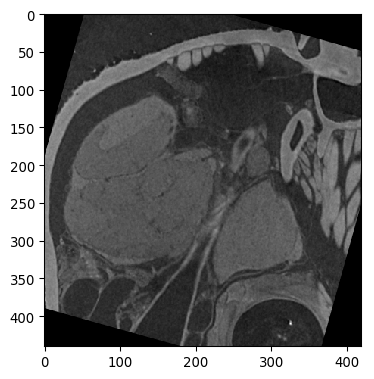

In [56]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate.augment_image(im)

print("Augmented:")
ia.imshow(image_aug)

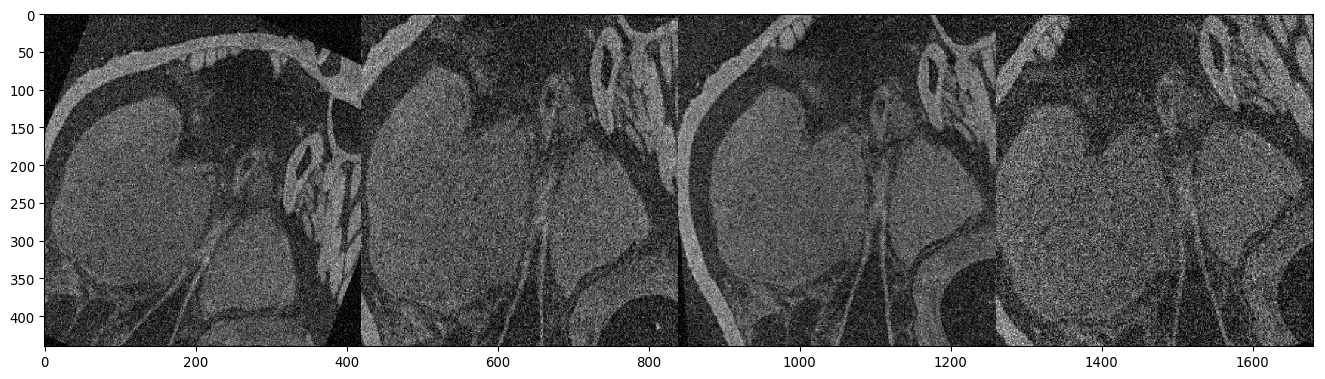

In [57]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0, 0.2))
])

images_aug = seq.augment_images([im,im,im,im])

ia.imshow(np.hstack(images_aug))

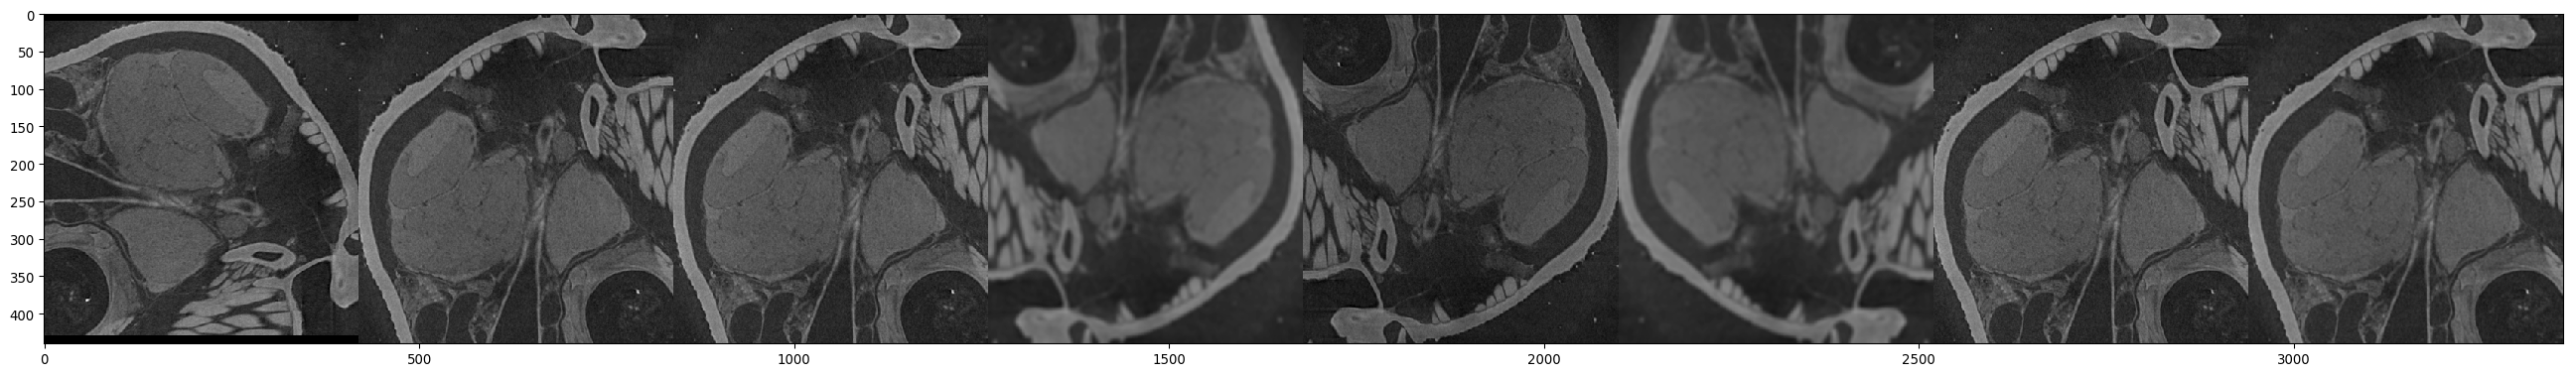

In [62]:
seq = iaa.SomeOf((0, 2), [
            iaa.Fliplr(0.5),
            iaa.Flipud(0.5),
            iaa.OneOf([iaa.Affine(rotate=90),
                       iaa.Affine(rotate=180),
                       iaa.Affine(rotate=270)]),
            iaa.Multiply((0.8, 1.5)),
            iaa.GaussianBlur(sigma=(0.0, 5.0))
        ], random_order=True)


ia.imshow(np.hstack(images_aug))

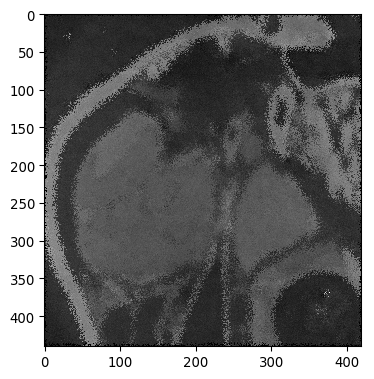

In [69]:
aug = iaa.ElasticTransformation(alpha=(0, 5.0), sigma=0.25)
image_aug = aug.augment_image(im)

ia.imshow(image_aug)

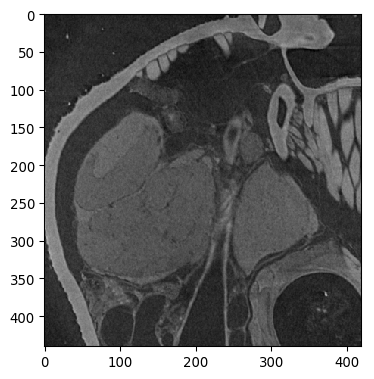

In [70]:
aug = iaa.GaussianBlur(sigma=(0.0,0.25))
image_aug = aug.augment_image(im)

ia.imshow(image_aug)